In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [3]:
df = pd.read_csv('cleaned_trip_data.csv', 
                 usecols=['medallion',
                          'pickup_hour', 'pickup_day_of_month',
                          'dropoff_hour',
                          'tip_amount', 
                          'fare_amount',
                          'pickup_latitude', 'pickup_longitude',
                          'dropoff_latitude', 'dropoff_longitude'
                         ])

df.head()

,medallion,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,dropoff_hour
0,E9A54865CAF737ED003957478C9D8FA1,-73.978104,40.752968,-73.985756,40.762684,6.0,1.0,15,25,16
1,43D85E4D101135DDFC1BC16DF53665FE,-73.982315,40.764828,-73.982132,40.758888,5.5,3.0,15,25,15
2,70166F37A5CC66D9A35366764ACC40DC,-73.982010,40.762508,-74.006851,40.719582,15.0,2.0,9,25,10
3,0C05C17E209CA4C15F89107F9D686FF3,-73.976006,40.744480,-74.016060,40.717297,14.0,2.9,6,25,7
4,0ECC4D3D2025A987532E1E5B5B26A119,-73.952621,40.780964,-73.981628,40.777977,12.0,2.0,10,25,10


# How do times and fares vary by trips?
### BEN NOTE From the point of view of the driver - How much does the driver receive for each trip?

In [4]:
# fare_amount - fare accrued on meter (depends on distance or time)
# surcharge	- goes to driver? (paid by customer)
# mta_tax - goes to state (paid by customer)
# tip_amount - goes to driver (paid by customer)
# tolls_amount - goes to state (paid by customer)
# total_amount

In [4]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,dropoff_hour
count,1.403405e+07,1.403405e+07,1.403405e+07,1.403405e+07,1.403405e+07,1.403405e+07,1.403405e+07,1.403405e+07,1.403405e+07
mean,-7.397544e+01,4.075065e+01,-7.397460e+01,4.075102e+01,1.235947e+01,1.415978e+00,1.345986e+01,1.501326e+01,1.345323e+01
std,3.378817e-02,2.680608e-02,3.319633e-02,3.065611e-02,9.523436e+00,2.169195e+00,6.578274e+00,8.546484e+00,6.648344e+00
min,-7.429939e+01,4.047618e+01,-7.429928e+01,4.048303e+01,2.500000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,-7.399223e+01,4.073577e+01,-7.399155e+01,4.073489e+01,6.500000e+00,0.000000e+00,9.000000e+00,8.000000e+00,9.000000e+00
50%,-7.398203e+01,4.075316e+01,-7.398043e+01,4.075369e+01,9.500000e+00,1.000000e+00,1.400000e+01,1.500000e+01,1.400000e+01
75%,-7.396791e+01,4.076781e+01,-7.396474e+01,4.076852e+01,1.450000e+01,2.000000e+00,1.900000e+01,2.200000e+01,1.900000e+01
max,-7.369097e+01,4.092983e+01,-7.369004e+01,4.093000e+01,5.000000e+02,2.000000e+02,2.300000e+01,3.000000e+01,2.300000e+01


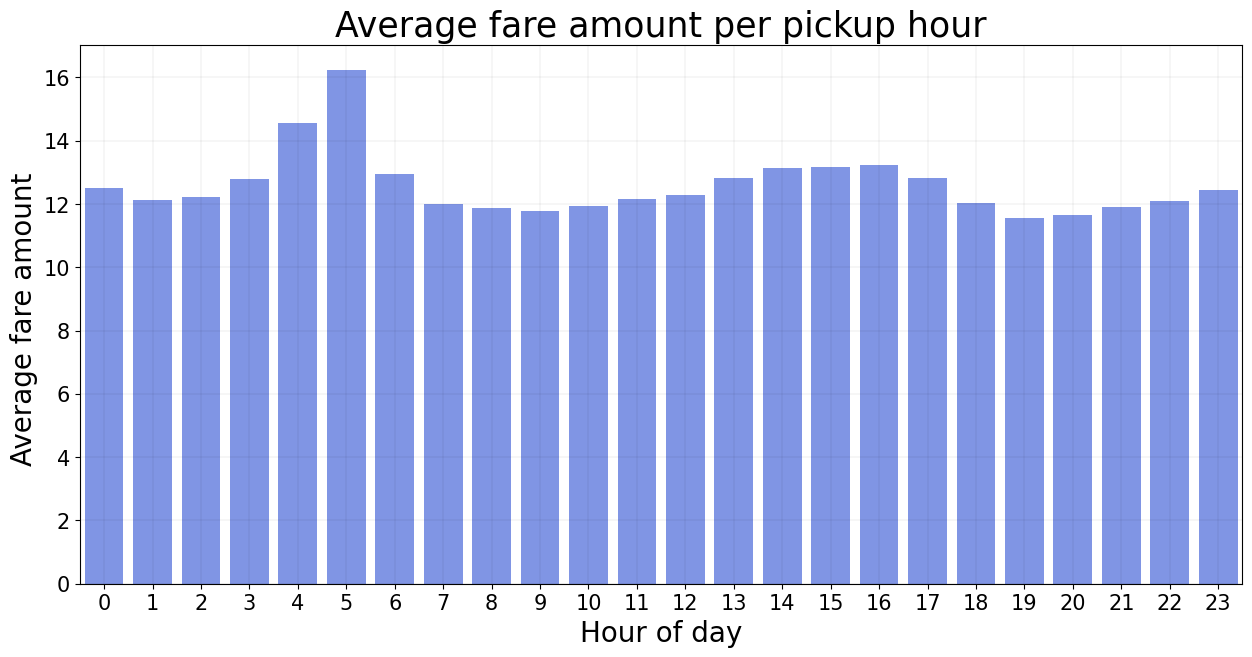

In [17]:
average_fare_per_pickup_hour = df.groupby('pickup_hour')['fare_amount'].mean().reset_index().rename(columns={'fare_amount': 'average_fare'})

# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=average_fare_per_pickup_hour,
           x='pickup_hour', y='average_fare',
           color='#6F8CF5')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

# plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average fare amount per pickup hour",fontsize=25)
ax.set_xlabel("Hour of day",fontsize=20)
ax.set_ylabel("Average fare amount ",fontsize=20)

ax.yaxis.set_tick_params(labelsize = 15);
ax.xaxis.set_tick_params(labelsize = 15);

plt.grid(True, color='black', linewidth=.05)

plt.show()

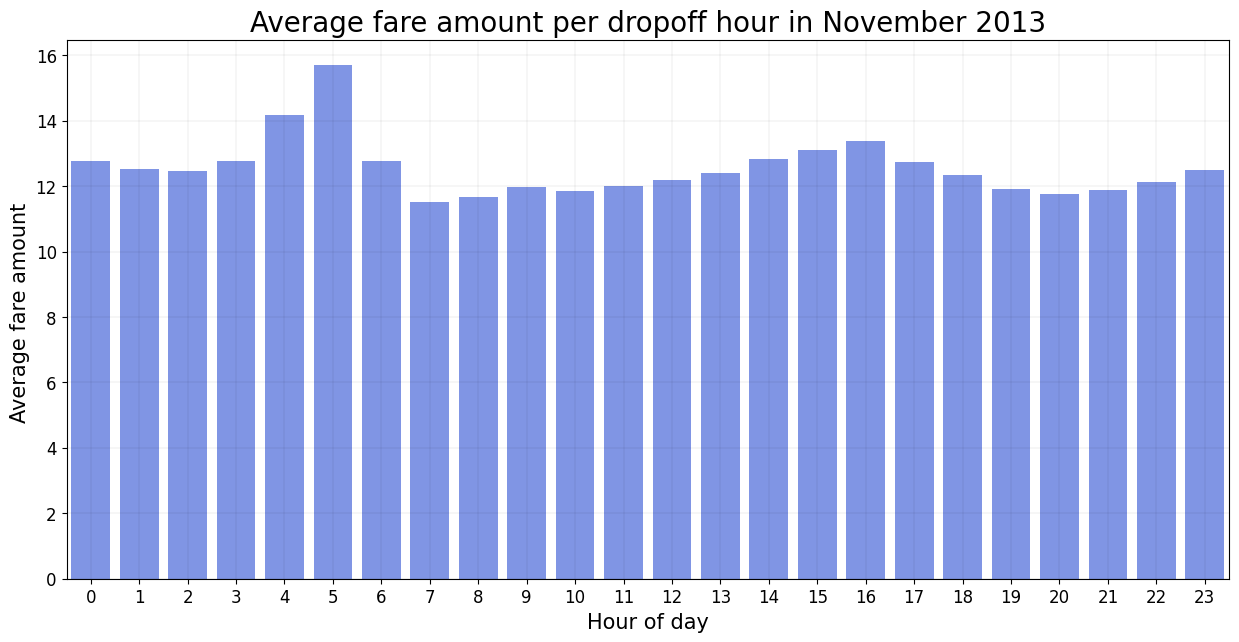

In [16]:
average_fare_per_dropoff_hour = df.groupby('dropoff_hour')['fare_amount'].mean().reset_index().rename(columns={'fare_amount': 'average_fare'})

# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=average_fare_per_dropoff_hour,
           x='dropoff_hour', y='average_fare',
           color='#6F8CF5')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

# plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average fare amount per dropoff hour",fontsize=20)
ax.set_xlabel("Hour of day",fontsize=15)
ax.set_ylabel("Average fare amount ",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);

plt.grid(True, color='black', linewidth=.05)

plt.show()

### Investigate spike at 4 and 5am perhaps based on location

In [7]:
round_to = 2
df['rounded_pickup_lat'] = df['pickup_latitude'].round(round_to)
df['rounded_pickup_long'] = df['pickup_longitude'].round(round_to)

df['rounded_dropoff_lat'] = df['dropoff_latitude'].round(round_to)
df['rounded_dropoff_long'] = df['dropoff_longitude'].round(round_to)

df

,medallion,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,dropoff_hour,rounded_pickup_lat,rounded_pickup_long,rounded_dropoff_lat,rounded_dropoff_long
0,E9A54865CAF737ED003957478C9D8FA1,-73.978104,40.752968,-73.985756,40.762684,6.0,1.0,15,25,16,40.75,-73.98,40.76,-73.99
1,43D85E4D101135DDFC1BC16DF53665FE,-73.982315,40.764828,-73.982132,40.758888,5.5,3.0,15,25,15,40.76,-73.98,40.76,-73.98
2,70166F37A5CC66D9A35366764ACC40DC,-73.982010,40.762508,-74.006851,40.719582,15.0,2.0,9,25,10,40.76,-73.98,40.72,-74.01
3,0C05C17E209CA4C15F89107F9D686FF3,-73.976006,40.744480,-74.016060,40.717297,14.0,2.9,6,25,7,40.74,-73.98,40.72,-74.02
4,0ECC4D3D2025A987532E1E5B5B26A119,-73.952621,40.780964,-73.981628,40.777977,12.0,2.0,10,25,10,40.78,-73.95,40.78,-73.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13940516,981161555DEE587A5BC8C928CB2514AE,-73.949677,40.776268,-73.783241,40.643860,52.0,5.0,4,25,5,40.78,-73.95,40.64,-73.78
13940517,926291789F6E904E920508D584D93301,-73.975464,40.755527,-73.975281,40.763924,6.0,2.0,8,25,8,40.76,-73.98,40.76,-73.98
13940518,B5A2A6106AC22D527F0DAF3E68E6E320,-74.003677,40.748505,-74.001793,40.721375,13.0,2.7,14,25,14,40.75,-74.00,40.72,-74.00
13940519,BE214ADD26750400C52407093C441701,-73.974876,40.782822,-73.986580,40.757378,7.5,1.7,4,25,4,40.78,-73.97,40.76,-73.99


In [8]:
avg_fare_by_pickup_location = df.groupby(['rounded_pickup_lat', 'rounded_pickup_long'])['fare_amount'].agg(['mean', 'median', 'count']).reset_index().rename(columns={'mean': 'mean_fare',
                                                                                                                                                             'median': 'median_fare',
                                                                                                                                                           'count': 'n_trips'})
avg_fare_by_pickup_location = avg_fare_by_pickup_location.loc[avg_fare_by_pickup_location['n_trips'] > 1000]

avg_fare_by_pickup_location.sort_values(by='median_fare', ascending=False).head(10).round(2)

,rounded_pickup_lat,rounded_pickup_long,mean_fare,median_fare,n_trips
244,40.64,-73.79,46.63,52.0,39712
245,40.64,-73.78,45.30,52.0,53209
281,40.65,-73.80,50.60,52.0,1963
282,40.65,-73.79,46.41,52.0,44181
283,40.65,-73.78,46.47,52.0,63973
368,40.67,-73.80,48.20,52.0,1309
809,40.77,-73.86,31.77,32.0,89479
806,40.77,-73.89,29.51,30.0,16326
808,40.77,-73.87,30.10,30.0,180216
807,40.77,-73.88,30.32,29.5,6537


In [ ]:
avg_fare_by_dropoff_location = df.groupby(['rounded_dropoff_lat', 'rounded_dropoff_long']
                                         )['fare_amount'].agg(['mean', 'median', 'count']).reset_index().rename(columns={'mean': 'mean_fare',
                                                                                                                                 'median': 'median_fare',
                                                                                                                               'count': 'n_trips'})
avg_fare_by_dropoff_location = avg_fare_by_dropoff_location.loc[avg_fare_by_dropoff_location['n_trips'] > 1000]

avg_fare_by_dropoff_location.sort_values(by='median_fare', ascending=False).head(20).round(2)

In [20]:
list(set(avg_fare_by_dropoff_location[avg_fare_by_dropoff_location['median_fare'] > 50].rounded_dropoff_lat.tolist()))

[40.64, 40.65, 40.66, 40.69, 40.7]

In [10]:

airport_pickup_lats = list(set(avg_fare_by_pickup_location[avg_fare_by_pickup_location['median_fare'] > 50].rounded_pickup_lat.tolist()))
airport_pickup_longs = list(set(avg_fare_by_pickup_location[avg_fare_by_pickup_location['median_fare'] > 50].rounded_pickup_long.tolist()))

airport_dropoff_lats = list(set(avg_fare_by_dropoff_location[avg_fare_by_dropoff_location['median_fare'] > 50].rounded_dropoff_lat.tolist()))
airport_dropoff_longs = list(set(avg_fare_by_dropoff_location[avg_fare_by_dropoff_location['median_fare'] > 50].rounded_dropoff_long.tolist()))

print(airport_pickup_lats, airport_pickup_longs)
print(airport_dropoff_lats, airport_dropoff_longs)

[40.64, 40.65, 40.67] [-73.78, -73.8, -73.79]
[40.64, 40.65, 40.66, 40.69, 40.7] [-73.81, -73.78, -73.8, -74.18, -73.79]


In [11]:

df['aiport_pickup_ind'] = 'N'
df['aiport_dropoff_ind'] = 'N'

df.loc[(df['rounded_pickup_lat'].isin(airport_pickup_lats)) & (df['rounded_pickup_long'].isin(airport_pickup_longs)), 'aiport_pickup_ind'] = 'Y'
df.loc[(df['rounded_dropoff_lat'].isin(airport_dropoff_lats)) & (df['rounded_dropoff_long'].isin(airport_dropoff_longs)), 'aiport_dropoff_ind'] = 'Y'

df

,medallion,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,dropoff_hour,rounded_pickup_lat,rounded_pickup_long,rounded_dropoff_lat,rounded_dropoff_long,aiport_pickup_ind,aiport_dropoff_ind
0,E9A54865CAF737ED003957478C9D8FA1,-73.978104,40.752968,-73.985756,40.762684,6.0,1.0,15,25,16,40.75,-73.98,40.76,-73.99,N,N
1,43D85E4D101135DDFC1BC16DF53665FE,-73.982315,40.764828,-73.982132,40.758888,5.5,3.0,15,25,15,40.76,-73.98,40.76,-73.98,N,N
2,70166F37A5CC66D9A35366764ACC40DC,-73.982010,40.762508,-74.006851,40.719582,15.0,2.0,9,25,10,40.76,-73.98,40.72,-74.01,N,N
3,0C05C17E209CA4C15F89107F9D686FF3,-73.976006,40.744480,-74.016060,40.717297,14.0,2.9,6,25,7,40.74,-73.98,40.72,-74.02,N,N
4,0ECC4D3D2025A987532E1E5B5B26A119,-73.952621,40.780964,-73.981628,40.777977,12.0,2.0,10,25,10,40.78,-73.95,40.78,-73.98,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13940516,981161555DEE587A5BC8C928CB2514AE,-73.949677,40.776268,-73.783241,40.643860,52.0,5.0,4,25,5,40.78,-73.95,40.64,-73.78,N,Y
13940517,926291789F6E904E920508D584D93301,-73.975464,40.755527,-73.975281,40.763924,6.0,2.0,8,25,8,40.76,-73.98,40.76,-73.98,N,N
13940518,B5A2A6106AC22D527F0DAF3E68E6E320,-74.003677,40.748505,-74.001793,40.721375,13.0,2.7,14,25,14,40.75,-74.00,40.72,-74.00,N,N
13940519,BE214ADD26750400C52407093C441701,-73.974876,40.782822,-73.986580,40.757378,7.5,1.7,4,25,4,40.78,-73.97,40.76,-73.99,N,N


In [12]:
counts_per_pickup_hour = df[['pickup_hour']].value_counts().reset_index().rename(columns={'count': 'count_trips'})

counts_per_airport_ind_pickup_hour = df[['aiport_pickup_ind', 'pickup_hour']].value_counts().reset_index().rename(
                                                                                                    columns={'count': 'count_per_airport_ind'})

merged_airport_pickup_and_total = pd.merge(left=counts_per_airport_ind_pickup_hour, 
                                right=counts_per_pickup_hour, 
                                on='pickup_hour', 
                                how='left').sort_values(by='pickup_hour').reset_index(drop=True)

merged_airport_pickup_and_total['proportion_airport_pickup'] = (merged_airport_pickup_and_total['count_per_airport_ind'] / merged_airport_pickup_and_total['count_trips'])*100

merged_airport_pickup_and_total.head(12)

,aiport_pickup_ind,pickup_hour,count_per_airport_ind,count_trips,proportion_airport_pickup
0,N,0,551179,559069,98.588725
1,Y,0,7890,559069,1.411275
2,Y,1,2073,442367,0.468615
3,N,1,440294,442367,99.531385
4,N,2,319169,319480,99.902654
5,Y,2,311,319480,0.097346
6,Y,3,228,232781,0.097946
7,N,3,232553,232781,99.902054
8,N,4,167831,168840,99.402393
9,Y,4,1009,168840,0.597607


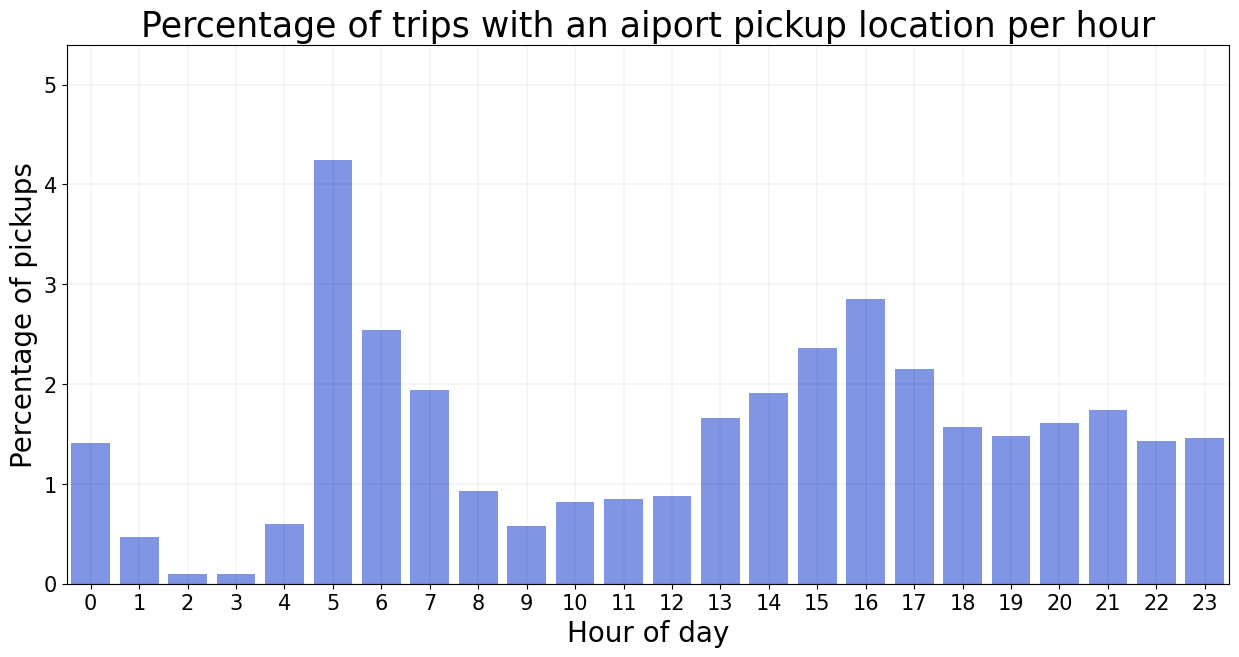

In [51]:
data_for_plot = merged_airport_pickup_and_total[merged_airport_pickup_and_total['aiport_pickup_ind']=='Y']


# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=data_for_plot,
           x='pickup_hour', y='proportion_airport_pickup',
           color='#6F8CF5')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

# plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Percentage of trips with an aiport pickup location per hour",fontsize=25)
ax.set_xlabel("Hour of day",fontsize=20)
ax.set_ylabel("Percentage of pickups",fontsize=20)

ax.set_yticks(np.arange(0, 7, step=1))
plt.ylim(0,5.4)

ax.yaxis.set_tick_params(labelsize = 15);
ax.xaxis.set_tick_params(labelsize = 15);

plt.grid(True, color='black', linewidth=.05)

plt.show()

In [22]:
counts_per_dropoff_hour = df[['dropoff_hour']].value_counts().reset_index().rename(columns={'count': 'count_trips'})

counts_per_airport_ind_dropoff_hour = df[['aiport_dropoff_ind', 'dropoff_hour']].value_counts().reset_index().rename(
                                                                                                    columns={'count': 'count_per_airport_ind'})

merged_airport_dropoff_and_total = pd.merge(left=counts_per_airport_ind_dropoff_hour, 
                                    right=counts_per_dropoff_hour, 
                                    on='dropoff_hour', 
                                    how='left').sort_values(by='dropoff_hour').reset_index(drop=True)

merged_airport_dropoff_and_total['proportion_airport_dropoff'] = (merged_airport_dropoff_and_total['count_per_airport_ind'] / merged_airport_dropoff_and_total['count_trips'])*100

merged_airport_dropoff_and_total.head(12)

,aiport_dropoff_ind,dropoff_hour,count_per_airport_ind,count_trips,proportion_airport_dropoff
0,N,0,590233,590661,99.927539
1,Y,0,428,590661,0.072461
2,Y,1,255,468279,0.054455
3,N,1,468024,468279,99.945545
4,N,2,339485,339733,99.927001
5,Y,2,248,339733,0.072999
6,Y,3,535,244989,0.218377
7,N,3,244454,244989,99.781623
8,N,4,179961,182447,98.637413
9,Y,4,2486,182447,1.362587


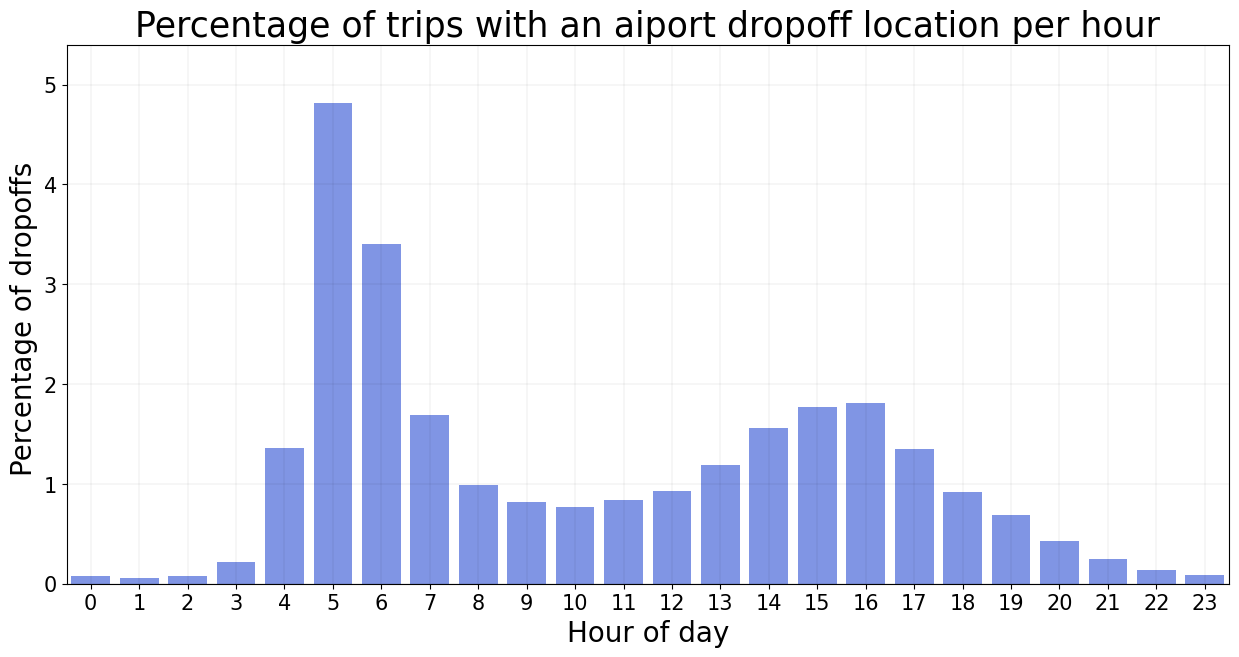

In [52]:
data_for_plot = merged_airport_dropoff_and_total[merged_airport_dropoff_and_total['aiport_dropoff_ind']=='Y']

# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=data_for_plot,
           x='dropoff_hour', y='proportion_airport_dropoff',
           color='#6F8CF5')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

ax.axes.set_title("Percentage of trips with an aiport dropoff location per hour",fontsize=25)
ax.set_xlabel("Hour of day",fontsize=20)
ax.set_ylabel("Percentage of dropoffs ",fontsize=20)

ax.set_yticks(np.arange(0, 7, step=1))
plt.ylim(0,5.4)
ax.yaxis.set_tick_params(labelsize = 15);
ax.xaxis.set_tick_params(labelsize = 15);

plt.grid(True, color='black', linewidth=.05)

plt.show()

<Axes: xlabel='rounded_long', ylabel='rounded_lat'>

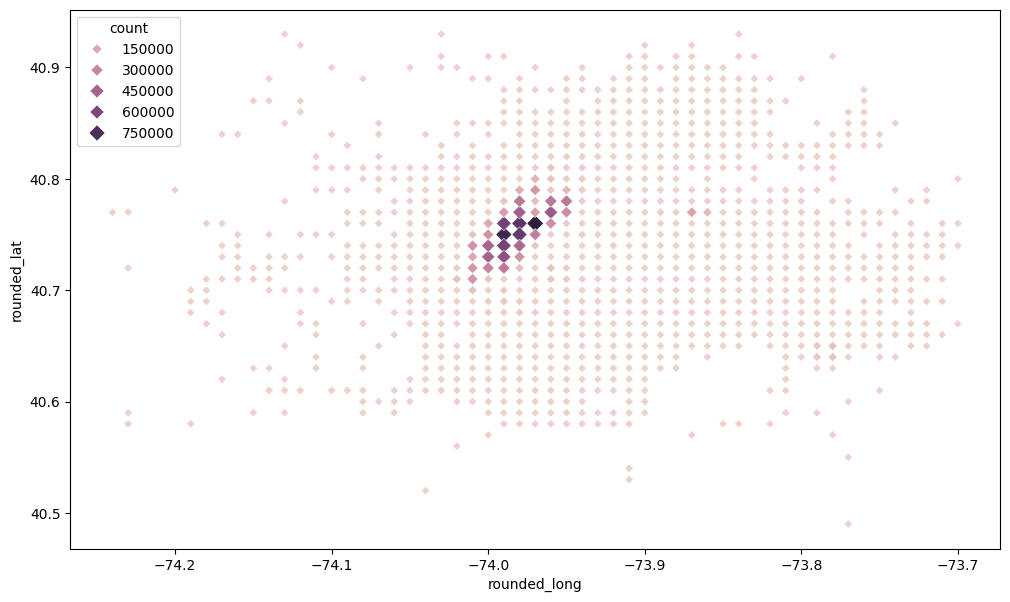

In [96]:


fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.scatterplot(x="rounded_pickup_long",
                y="rounded_pickup_lat",
                data=rounded_areas_trips.head(1000),
                hue="count",
                size='count',
               marker='D')

In [75]:
df[df['pickup_hour']==5]

,medallion,hack_license,pickup_longitude,pickup_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,rounded_lat,rounded_long
8,8F160024B5E4CE5B7859AE20A4CC26D5,4A1768BADB3B7E83665104410B54A32C,-73.971558,40.794548,14.5,1.0,5,25,40.79,-73.97
106,6CA28FC493307AE347CDF4A4C49A9A96,443ED4A8D53B8CD57E81EE8C9662DB74,-73.957603,40.766090,8.5,3.0,5,25,40.77,-73.96
109,2280C8996D940FE5B586E8FF96F91A0B,8686346D3AFBBC22607B20A036FE61B7,-73.991379,40.759274,4.0,1.0,5,25,40.76,-73.99
3632,7896788B80BC3AD1CC9A188414181C92,8E3865D72C7AEDFDD9F3E12D71FF0495,-73.999107,40.726421,7.5,1.0,5,26,40.73,-74.00
20217,2F15B39D5CC3C332688612724EF80F01,B26A6CD540466B95CCFB7504994EDDDE,-73.985664,40.722202,5.5,1.0,5,30,40.72,-73.99
...,...,...,...,...,...,...,...,...,...,...
14034004,BDFD66ABE176B1096CF7DC8B2BFE9F8C,E33A00F11E9EFC990852BE47CFE6AFB9,-73.993645,40.742592,4.5,0.5,5,25,40.74,-73.99
14034014,F696855822217C42E8872CD817C0EAD8,EF1E45065AC7DAA4C0938ABAF99ACB89,-74.003906,40.725658,4.5,1.0,5,25,40.73,-74.00
14034018,C2A40A5B0F1B26BF17FD07F91CD6176C,A25BE051A63586CBE82D0DA50F2BCDAB,-73.975311,40.777290,30.5,7.0,5,25,40.78,-73.98
14034020,1927FA75767B8BF80452FE39FC8A1F44,622FE4D87B4E4863AE488E33D78A0118,-73.974022,40.788952,9.5,1.0,5,25,40.79,-73.97


In [76]:
df[df['pickup_hour']==5][['rounded_pickup_lat', 'rounded_pickup_long']].value_counts().reset_index()

,rounded_lat,rounded_long,count
0,40.76,-73.99,10360
1,40.75,-73.99,9323
2,40.73,-73.99,5695
3,40.74,-74.00,5413
4,40.76,-73.97,5207
...,...,...,...
458,40.89,-73.86,1
459,40.89,-73.84,1
460,40.58,-73.99,1
461,40.90,-73.86,1


<Axes: xlabel='rounded_long', ylabel='rounded_lat'>

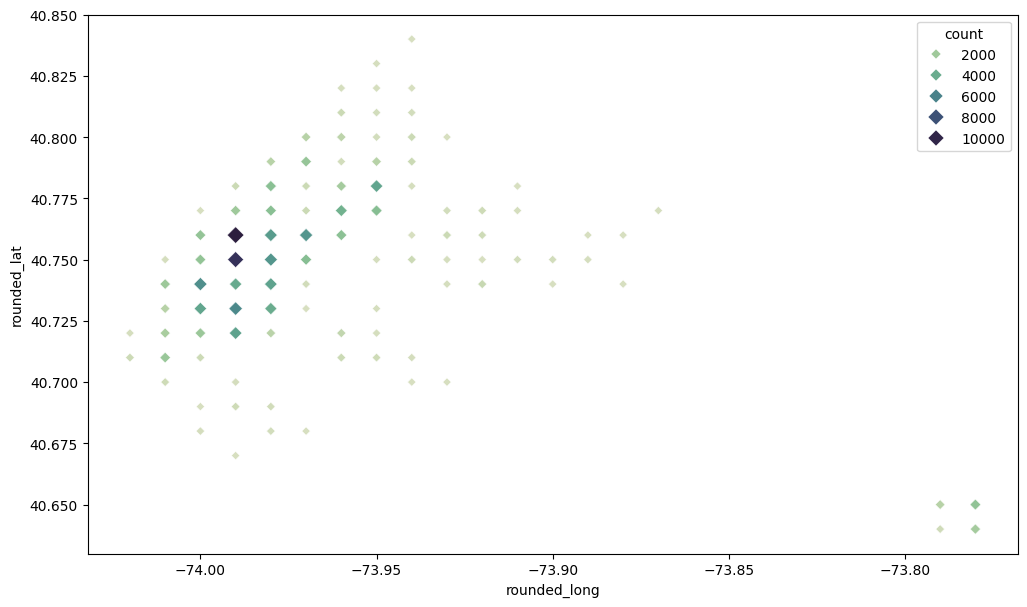

In [90]:
data_for_plot = df[df['pickup_hour']==5][['rounded_pickup_lat', 'rounded_pickup_long']].value_counts().reset_index()

fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.scatterplot(x="rounded_pickup_long",
                y="rounded_pickup_lat",
                data=data_for_plot.head(100),
                hue="count",
                size='count',
               marker='D',
               palette=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))

In [81]:
rounded_lat_jfk = [40.64, 40.65]
rounded_long_jfk = [-73.79, -73.78]

data_for_plot.loc[data_for_plot['rounded_pickup_long'] > -73.8]

,rounded_lat,rounded_long,count
19,40.65,-73.78,2512
28,40.64,-73.78,1839
30,40.65,-73.79,1289
55,40.64,-73.79,383
146,40.66,-73.79,27
206,40.71,-73.79,8
231,40.73,-73.75,6
239,40.67,-73.79,6
292,40.71,-73.78,2
293,40.71,-73.73,2


<Axes: xlabel='rounded_long', ylabel='rounded_lat'>

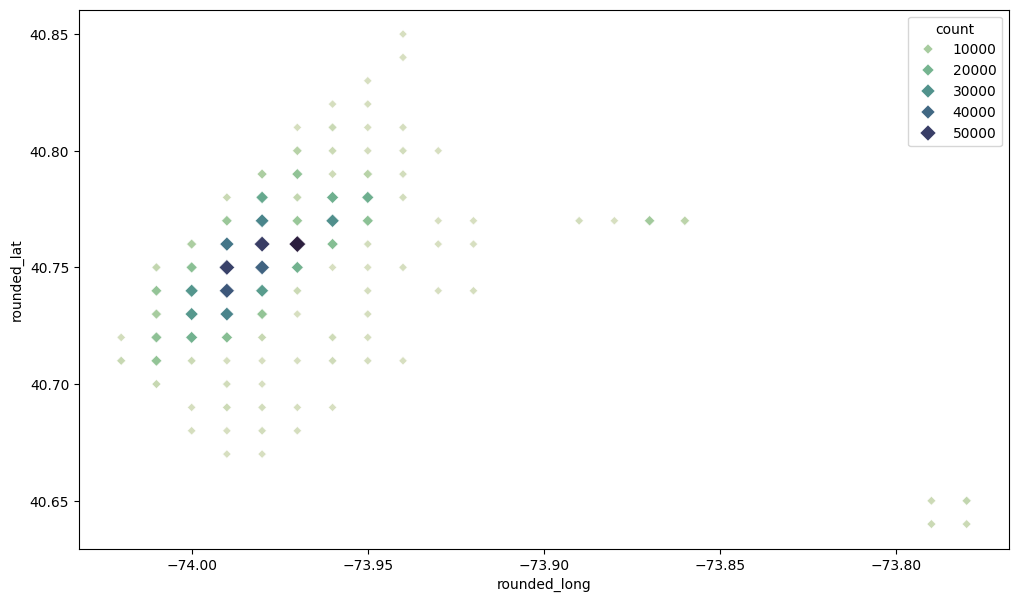

In [91]:
data_for_plot = df[df['pickup_hour']==19][['rounded_pickup_lat', 'rounded_pickup_long']].value_counts().reset_index()

fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.scatterplot(x="rounded_pickup_long",
                y="rounded_pickup_lat",
                data=data_for_plot.head(100),
                hue="count",
                size='count',
               marker='D',
               palette=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))

In [97]:
df

,medallion,hack_license,pickup_longitude,pickup_latitude,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,rounded_lat,rounded_long
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,-73.978104,40.752968,6.0,1.0,15,25,40.75,-73.98
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,-73.982315,40.764828,5.5,3.0,15,25,40.76,-73.98
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,-73.982010,40.762508,15.0,2.0,9,25,40.76,-73.98
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,-73.976006,40.744480,14.0,2.9,6,25,40.74,-73.98
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,-73.952621,40.780964,12.0,2.0,10,25,40.78,-73.95
...,...,...,...,...,...,...,...,...,...,...
14034045,981161555DEE587A5BC8C928CB2514AE,F371B99C7A715A375CD4B035C32732E5,-73.949677,40.776268,52.0,5.0,4,25,40.78,-73.95
14034046,926291789F6E904E920508D584D93301,F7D2634D82BEFEFCEAFCD9D7A5C2846A,-73.975464,40.755527,6.0,2.0,8,25,40.76,-73.98
14034047,B5A2A6106AC22D527F0DAF3E68E6E320,E1A4A83FA1BEA573C823984082C6BFED,-74.003677,40.748505,13.0,2.7,14,25,40.75,-74.00
14034048,BE214ADD26750400C52407093C441701,D9573F449F1B17818F9485EB5E319E1F,-73.974876,40.782822,7.5,1.7,4,25,40.78,-73.97
